# This notebook represents the Predictive Analysis of "Salary" using the Simple Linear Regression model.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
def read_data():
    data = pd.read_csv("C:/Users/Rushikesh/Desktop/Machine Learning/Projects and Assignments/Project - 1&2_ Simple_Reg/Salary_Data.csv")
    return data

In [7]:
data = read_data()
data.head(5)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## Making a copy of original data and performing operations on copied data only

In [8]:
df = data.copy()
df.head(5)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## Exploratory Data Analysis  (EDA)

In [9]:
df.shape

(30, 2)

In [11]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [14]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [15]:
df.duplicated().sum()

0

In [16]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

### EDA - Feature Engineering

In [37]:
col = df.columns

col_names = []           
for i in col:
    c = i.lower()
    col_names.append(c)
    print(c)

print(col_names)

yearsexperience
salary
['yearsexperience', 'salary']


In [42]:
df.columns = col_names
print(col)

['yearsexperience', 'salary']


### EDA - Box plot of each variable

<Axes: >

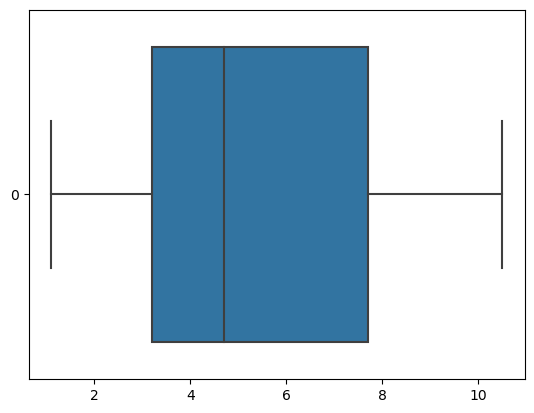

In [45]:
sns.boxplot(data = df['yearsexperience'], orient = 'h')      ## No outliers in variable

<Axes: >

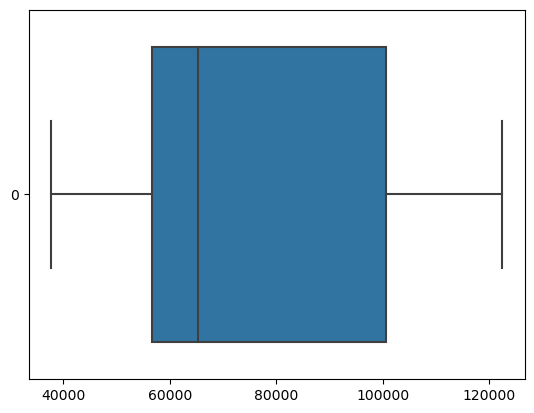

In [46]:
sns.boxplot(data = df['salary'], orient = 'h')     ## No outliers in variable

### EDA - Correlation Analysis

In [47]:
df.corr()                     ## Both the variables are highly correlated to one another

,yearsexperience,salary
yearsexperience,1.000000,0.978242
salary,0.978242,1.000000


<Axes: >

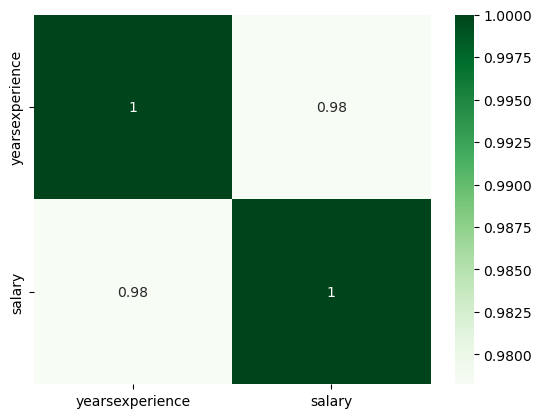

In [53]:
sns.heatmap(df.corr(), annot = True, cmap = "Greens")

## Statistical Analysis

In [89]:
print("Average years of experience : ", round(df['yearsexperience'].mean(),2)) 
print("Average salary earned is : ", round(df['salary'].mean(),2))
print("Minimum salary earned is : ", df['salary'].min())
print("Maximum salary earned is : ", df['salary'].max())

Average years of experience :  5.31
Average salary earned is :  76003.0
Minimum salary earned is :  37731.0
Maximum salary earned is :  122391.0


Data is fairly skewed and distraibution symmetric and skewness is :  0.38


C:\Users\Rushikesh\AppData\Local\Temp\ipykernel_14104\1066444685.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['yearsexperience'])


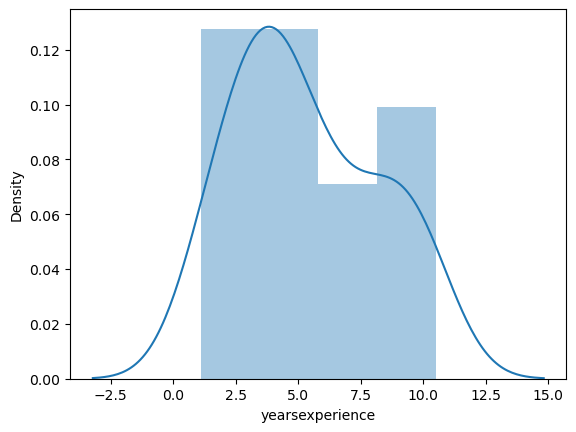

In [74]:
sns.distplot(df['yearsexperience'])

skewness = df['yearsexperience'].skew()

c = print("Data is fairly skewed and distraibution symmetric and skewness is : ", round(skewness,2)) if (skewness>= -0.5 or skewness<=0.5) else print("Data is with skewness and skewness is : ", round(skewness,2))


C:\Users\Rushikesh\AppData\Local\Temp\ipykernel_14104\4214464865.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['salary'])


Data is fairly skewed and distribution is symmetric and skewness is :  0.35


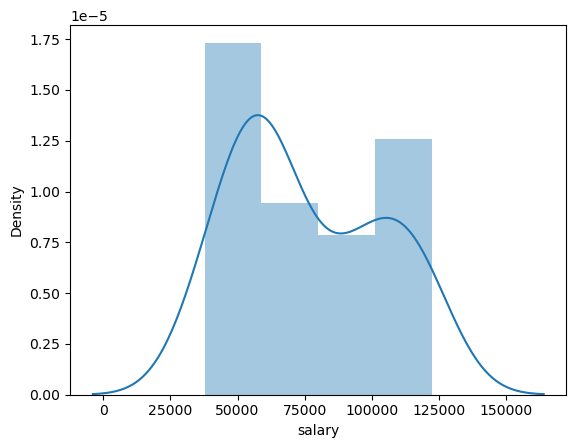

In [73]:
sns.distplot(df['salary'])

skewness = df['salary'].skew()

c1 = print("Data is fairly skewed and distribution is symmetric and skewness is : ", round(skewness,2)) if (skewness>= -0.5 or skewness<=0.5) else print("Data is with skewness and skewness is : ", round(skewness,2))


<Axes: xlabel='salary', ylabel='yearsexperience'>

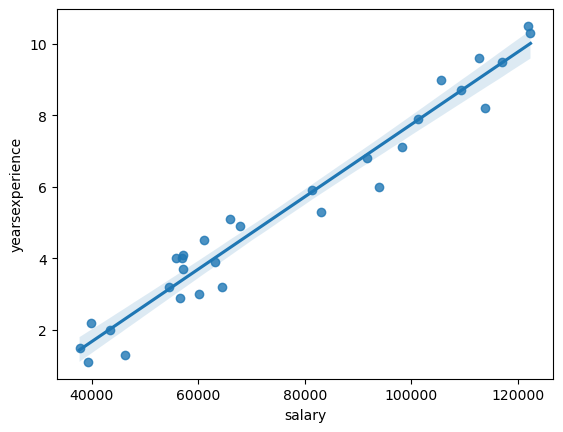

In [80]:
sns.regplot(data = df, x = 'salary', y = 'yearsexperience') 

## Data is estimated to be at close proximity to the regression line

## Data Visualization

<Axes: xlabel='yearsexperience', ylabel='salary'>

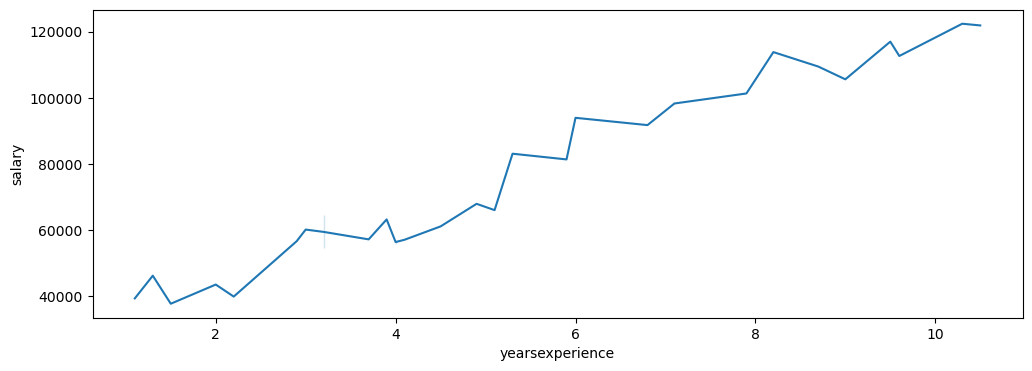

In [87]:
plt.subplots(figsize = (12,4))
sns.lineplot(data = df, x = 'yearsexperience', y = 'salary', markers = True)

## Applying Logarithmic Transformation using numpy to remove +ve skewness in data

In [249]:
log_yexp = np.log(df['yearsexperience'])
log_yexp.head(5)

0    0.095310
1    0.262364
2    0.405465
3    0.693147
4    0.788457
Name: yearsexperience, dtype: float64

In [250]:
log_salary = np.log(df['salary'])
log_salary.head(5)

0    10.580073
1    10.740843
2    10.538237
3    10.681091
4    10.593906
Name: salary, dtype: float64

## Splitting the variable or features

In [251]:
X = log_yexp.values.reshape(-1,1)
Y = log_salary.values.reshape(-1,1)

In [252]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [253]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=12345)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(24, 1) (24, 1)
(6, 1) (6, 1)


## Model Building, Fitting or Training the data and Learning

In [254]:
model = LinearRegression()
model

LinearRegression()

In [255]:
model_fit = model.fit(X_train, Y_train)
model_fit

LinearRegression()

In [256]:
pred_train = model_fit.predict(X_train)
pred_train

array([[10.39630036],
       [11.54578099],
       [11.43281896],
       [11.40882222],
       [10.98984702],
       [10.95397404],
       [11.51288155],
       [11.49216469],
       [11.09980613],
       [11.12760384],
       [11.11387874],
       [11.33925176],
       [11.24891752],
       [11.56462477],
       [11.17934706],
       [11.27029855],
       [11.60049775],
       [11.65030761],
       [11.63961809],
       [11.07054473],
       [10.78157807],
       [10.48915541],
       [10.93513026],
       [10.56869633]])

R2_Score of training data is : 0.9
MAE of training data is :  0.09
MSE of training data is :  0.01
Sqrt(MSE) of training data is :  0.12


<Axes: >

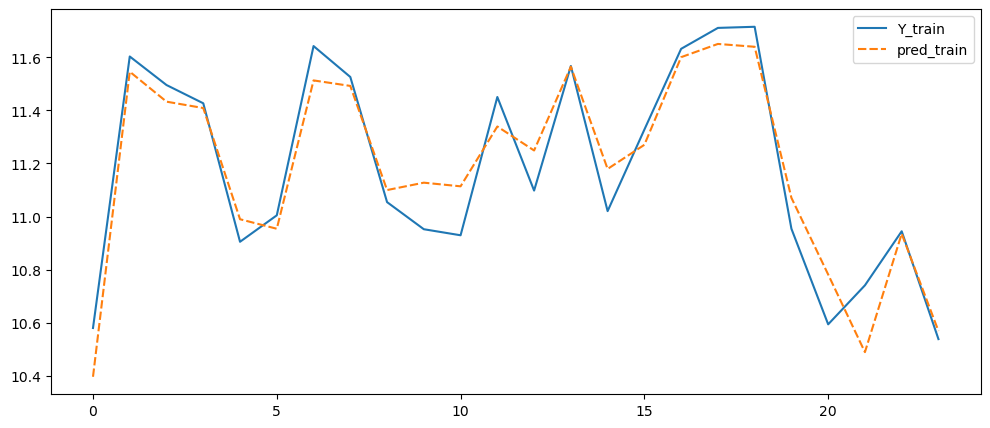

In [257]:
Y_train = pd.DataFrame(data = Y_train, columns = ['Y_train'])
pred_train = pd.DataFrame(data = pred_train, columns = ['pred_train'])
concat_train = pd.concat([Y_train, pred_train],axis = 1)

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

print("R2_Score of training data is :", round(r2_score(Y_train, pred_train),2))
print("MAE of training data is : ", round(mean_absolute_error(Y_train, pred_train),2))
print("MSE of training data is : ", round(mean_squared_error(Y_train, pred_train),2))
print("Sqrt(MSE) of training data is : ", round(sqrt(mean_squared_error(Y_train, pred_train)),2))

plt.subplots(figsize = (12,5))
sns.lineplot(data = concat_train)

## Model Testing and Prediction

In [258]:
pred = model_fit.predict(X_test)

Y_test = pd.DataFrame(data = Y_test, columns = ['Y_test'])
pred = pd.DataFrame(data = pred, columns = ['pred'])
concat_test = pd.concat([Y_test, pred],axis = 1)
print(concat_test)

      Y_test       pred
0  11.669664  11.594677
1  10.950052  11.113879
2  11.306676  11.329910
3  10.681091  10.728601
4  11.126351  11.226681
5  11.073567  10.989847


R2_Score of testing data is : 0.91
MAE of testing data is :  0.08
MSE of testing data is :  0.01
Sqrt(MSE) of testing data is :  0.09


<Axes: >

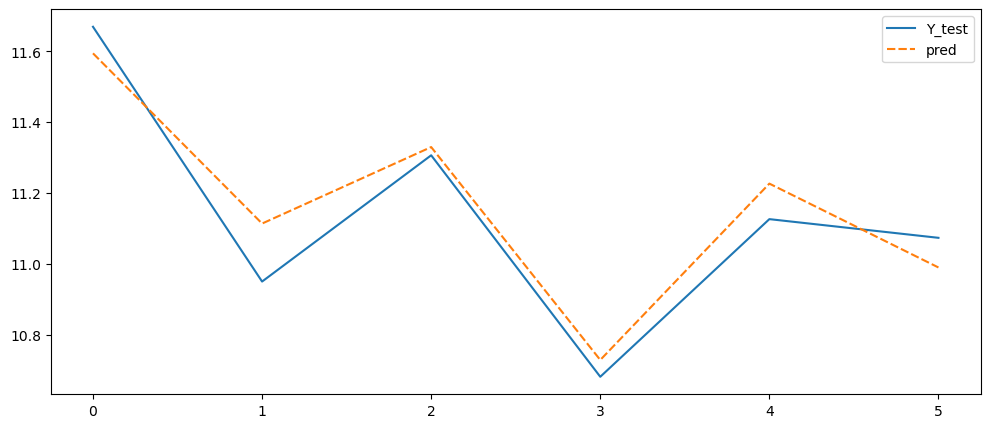

In [259]:
print("R2_Score of testing data is :", round(r2_score(Y_test, pred),2))
print("MAE of testing data is : ", round(mean_absolute_error(Y_test,pred),2))
print("MSE of testing data is : ", round(mean_squared_error(Y_test, pred),2))
print("Sqrt(MSE) of testing data is : ", round(sqrt(mean_squared_error(Y_test,pred)),2))

plt.subplots(figsize = (12,5))
sns.lineplot(data = concat_test)

# Conclusion = We can easily witness that MSE value is more than higher and one of the conclusions can be 
# Model has overfitted while training.

# So to reduce the overfitting and getting a descent value of MSE we use regularization techniques

In [260]:
ridge = Ridge()
ridge

Ridge()

In [261]:
ridge_fit = ridge.fit(X_train, Y_train)
ridge_fit

Ridge()

In [262]:
pred_ridge = ridge_fit.predict(X_test)

print("R2_Score of ridge testing data is :", round(r2_score(Y_test, pred_ridge),2))
print("MAE of ridge testing data is : ", round(mean_absolute_error(Y_test,pred_ridge),2))
print("MSE of ridge testing data is : ", round(mean_squared_error(Y_test, pred_ridge),2))
print("Sqrt(MSE) of ridge testing data is : ", round(sqrt(mean_squared_error(Y_test,pred_ridge)),2))

R2_Score of ridge testing data is : 0.89
MAE of ridge testing data is :  0.09
MSE of ridge testing data is :  0.01
Sqrt(MSE) of ridge testing data is :  0.1


In [263]:
lasso = Lasso()
lasso

Lasso()

In [264]:
lasso_fit = lasso.fit(X_train, Y_train)
lasso_fit

Lasso()

In [265]:
pred_lasso = lasso_fit.predict(X_test)

print("R2_Score of lasso testing data is :", round(r2_score(Y_test, pred_lasso),2))
print("MAE of lasso testing data is : ", round(mean_absolute_error(Y_test,pred_lasso),2))
print("MSE of lasso testing data is : ", round(mean_squared_error(Y_test, pred_lasso),2))
print("Sqrt(MSE) of lasso testing data is : ", round(sqrt(mean_squared_error(Y_test,pred_lasso)),2))

R2_Score of lasso testing data is : -0.03
MAE of lasso testing data is :  0.25
MSE of lasso testing data is :  0.1
Sqrt(MSE) of lasso testing data is :  0.31


# Use of Ridge and Lasso Regression is not making any difference. In this case we can reply on Scalars like Standard Scalar

In [266]:
from sklearn.preprocessing import StandardScaler

In [267]:
scalar = StandardScaler()
scalar

StandardScaler()

In [268]:
X_SC = scalar.fit_transform(X)
X_SC

array([[-2.29684695e+00],
       [-2.02465696e+00],
       [-1.79149524e+00],
       [-1.32275974e+00],
       [-1.16746586e+00],
       [-7.17351733e-01],
       [-6.62114155e-01],
       [-5.56958155e-01],
       [-5.56958155e-01],
       [-3.20405485e-01],
       [-2.34630287e-01],
       [-1.93378653e-01],
       [-1.93378653e-01],
       [-1.53145684e-01],
       [-1.46857064e-03],
       [ 1.37283517e-01],
       [ 2.02466308e-01],
       [ 2.65141439e-01],
       [ 4.39882211e-01],
       [ 4.67266931e-01],
       [ 6.71201810e-01],
       [ 7.41544496e-01],
       [ 9.15507163e-01],
       [ 9.76235403e-01],
       [ 1.07267494e+00],
       [ 1.12791252e+00],
       [ 1.21600708e+00],
       [ 1.23306852e+00],
       [ 1.34774364e+00],
       [ 1.37907831e+00]])

In [269]:
x_train, x_test, y_train, y_test = train_test_split(X_SC, Y, train_size=0.8,random_state=1234)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(24, 1) (24, 1)
(6, 1) (6, 1)


## Using LR model again to predict values using Standard Scalar

In [270]:
model_sc = LinearRegression()
model_sc

LinearRegression()

In [271]:
sc_fit = model_sc.fit(x_train, y_train)
sc_fit

LinearRegression()

In [272]:
pred_y_train = sc_fit.predict(x_train)

print("R2_Score of SC training data is :", round(r2_score(y_train, pred_y_train),2))


R2_Score of SC training data is : 0.92


In [277]:
pred_sc = sc_fit.predict(x_test)
print(pred_sc)
print(x_test)

print("R2_Score of SC testing data is :", round(r2_score(y_test, pred_sc),2))
print("MAE of SC testing data is : ", round(mean_absolute_error(y_test,pred_sc),2))
print("MSE of SC testing data is : ", round(mean_squared_error(y_test, pred_sc),2))
print("Sqrt(MSE) of SC testing data is : ", round(sqrt(mean_squared_error(y_test,pred_sc)),2))

[[10.96815968]
 [11.08301544]
 [10.75061618]
 [10.44517147]
 [11.64686608]
 [10.96815968]]
[[-0.55695815]
 [-0.23463029]
 [-1.16746586]
 [-2.02465696]
 [ 1.34774364]
 [-0.55695815]]
R2_Score of SC testing data is : 0.83
MAE of SC testing data is :  0.12
MSE of SC testing data is :  0.02
Sqrt(MSE) of SC testing data is :  0.15


# At first, I could not find the solution for below overfitting problem, as in fitting phase model has fitted to simplistically and data was close to symmetric or normall distributed but slightly inclinde towards positive skew. I applied all the models and scaling techniques to diagnose the data properly, but it didn't work. 

## LR training Diagnostics : 

### R2_Score of LR training data is : 0.96
### MAE of LR training data is :  4887.33
### MSE of LR training data is :  33433742.58
### Sqrt(MSE) of LR training data is :  5782.19

## LR Testing diagnostics : 
    
### R2_Score of LR testing data is : 0.96
### MAE of LR testing data is :  3706.63
### MSE of LR testing data is :  22674418.09
### Sqrt(MSE) LR of testing data is :  4761.77

## Ridge Diagnostics : 
    
### R2_Score of ridge testing data is : 0.96
### MAE of ridge testing data is :  3759.75
### MSE of ridge testing data is :  22739257.77
### Sqrt(MSE) of ridge testing data is :  4768.57

## Lasso Diagnostics : 
    
### R2_Score of lasso testing data is : 0.96
### MAE of lasso testing data is :  3706.76
### MSE of lasso testing data is :  22674549.69
### Sqrt(MSE) of lasso testing data is :  4761.78

## Standard Scalar Diagnostics : 
    
### R2_Score of SC testing data is : 0.95
### MAE of SC testing data is :  4593.51
### MSE of SC testing data is :  34689246.6
### Sqrt(MSE) of SC testing data is :  5889.76



# Then I decided to do Logarithimic Transformation to make the data normally distributed as there was some positive skewness. As a result, data is now fitted properly and showing me error values which are realistic and transformed model is now ready for future predictions

## LR Testing diagnostics : 

### R2_Score of testing data is : 0.91
### MAE of testing data is :  0.08
### MSE of testing data is :  0.01
### Sqrt(MSE) of testing data is :  0.09

## Ridge Diagnostics : 

### R2_Score of ridge testing data is : 0.89
### MAE of ridge testing data is :  0.09
### MSE of ridge testing data is :  0.01
### Sqrt(MSE) of ridge testing data is :  0.1

## Standard Scalar Diagnostics : 

### R2_Score of SC testing data is : 0.83
### MAE of SC testing data is :  0.12
### MSE of SC testing data is :  0.02
### Sqrt(MSE) of SC testing data is :  0.15

# R2 score before Log Transformation (I considered model was overfitted and data was with skewness) for training and testing data are 0.96 and 0.96 respectively.

# R2 score after Log Transformation for testing data is 0.91